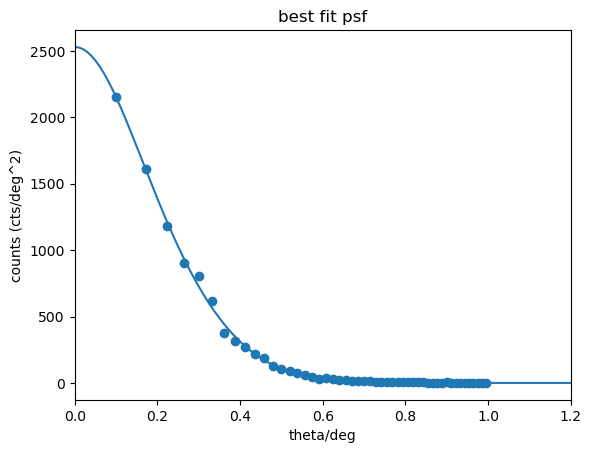

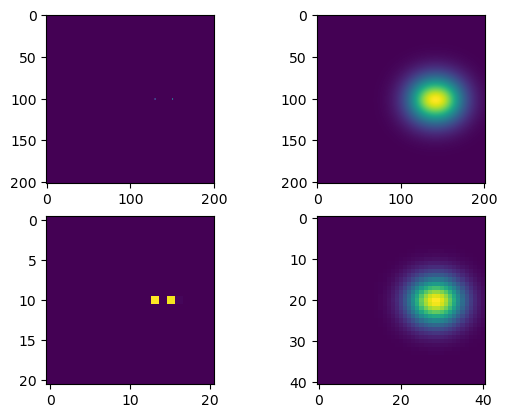

2.00
1.99
2.00
1.99



In [1]:
from scipy.optimize import curve_fit
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit
import tqdm
import scipy
from PSF import *

psfconv = fitpsf(1,plot=True)  #1-8 代表不同能量段，一般选1。返回的psfconv是一个函数。
x = y = np.linspace(-1,1,201)          #创建x和y,分别代表ra和dec
xx,yy = np.meshgrid(x,y)               #创建坐标格点
z = np.zeros_like(xx)                  
    
z = add_pointsrc(0,0.3,1,x,y,z)        #添加一个源，这里的add_src函数是添加点源的函数，参考上面的函数定义。
z = add_pointsrc(0,0.512312,1,x,y,z)   #添加两个源
blurz = psfconv(z,x,y)               #这个函数输入天图以及上面两个

zbin,xxb,yyb = bindata(z,x,y,0.1)     #这个函数最后一个参数是bin后格点的宽度（deg）
blurzbin,xxb,yyb = bindata(blurz,x,y,0.05) 

fig,ax = plt.subplots(2,2)
ax[0][0].imshow(z)
ax[0][1].imshow(blurz)
ax[1][0].imshow(zbin)
ax[1][1].imshow(blurzbin)
plt.show()
print('%.2f\n%.2f\n%.2f\n%.2f\n'%(zbin.sum(),blurzbin.sum(),z.sum(),blurz.sum()))
